In [1]:
### importing Intial libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import xgboost as xgb

%pylab inline
pd.options.display.max_columns=100
pd.options.display.max_rows=15

os.chdir("D:\\analytixlabs\\Complete_datasets")
print os.getcwd() 
Telecom=pd.read_csv("Proactive Attrition Management-Logistic Regression Case Study.csv")
#Telecom.head()

Populating the interactive namespace from numpy and matplotlib
D:\analytixlabs\Complete_datasets


In [2]:
Val_Telecom=Telecom.loc[Telecom.CHURNDEP.isnull()]
TT_Telecom=Telecom.loc[Telecom.CHURNDEP.isin([0,1])]
print Val_Telecom.shape
print TT_Telecom.shape

(31047, 78)
(40000, 78)


# 1. Steps of Data Exploration and Preparation

Remember the quality of your inputs decide the quality of your output. So, once you have got your business hypothesis ready, it makes sense to spend lot of time and efforts here. With my personal estimate, data exploration, cleaning and preparation can take up to 70% of your total project time.

Below are the steps involved to understand, clean and prepare your data for building your predictive model:

### Variable Identification

In [3]:
pd.DataFrame(zip(Telecom.columns,Telecom.dtypes) ,columns=['col_name','dtype']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77
col_name,REVENUE,MOU,RECCHRGE,DIRECTAS,OVERAGE,ROAM,CHANGEM,CHANGER,DROPVCE,BLCKVCE,UNANSVCE,CUSTCARE,THREEWAY,MOUREC,OUTCALLS,INCALLS,PEAKVCE,OPEAKVCE,DROPBLK,CALLFWDV,CALLWAIT,CHURN,MONTHS,UNIQSUBS,ACTVSUBS,CSA,PHONES,MODELS,EQPDAYS,CUSTOMER,AGE1,AGE2,CHILDREN,CREDITA,CREDITAA,CREDITB,CREDITC,CREDITDE,CREDITGY,CREDITZ,PRIZMRUR,PRIZMUB,PRIZMTWN,REFURB,WEBCAP,TRUCK,RV,OCCPROF,OCCCLER,OCCCRFT,OCCSTUD,OCCHMKR,OCCRET,OCCSELF,OWNRENT,MARRYUN,MARRYYES,MARRYNO,MAILORD,MAILRES,MAILFLAG,TRAVEL,PCOWN,CREDITCD,RETCALLS,RETACCPT,NEWCELLY,NEWCELLN,REFER,INCMISS,INCOME,MCYCLE,CREDITAD,SETPRCM,SETPRC,RETCALL,CALIBRAT,CHURNDEP
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,object,float64,float64,float64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,float64


### Univariate Analysis

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable
type is categorical or continuous. Let’s look at these methods and statistical measures for categorical and continuous variables individually:

**Continuous Variables** :- In case of continuous variables, we need to understand the central tendency and spread of the variable.
    These are measured using various statistical metrics visualization methods as shown below:

In [ ]:
#boxplot
col_list=TT_Telecom.columns.tolist()
for col in col_list:
    if(TT_Telecom[col].dtype in [np.int64, np.int32, np.float64]):
        print col
        fig = plt.figure(figsize = (6,6))
        fig.clf()
        ax = fig.gca()
        TT_Telecom[[col, 'CHURNDEP']].boxplot(column = [col], ax = ax, by = ['CHURNDEP'])



In [ ]:
#histogram
TT_Telecom.hist(figsize=(10,600),layout=(100,1),bins=40);


**Categorical Variables** :- For categorical variables, we’ll use frequency table to understand distribution of each category.
    We can also read as percentage of values under each category. It can be be measured using two metrics,
    Count and Count% against each category. Bar chart can be used as visualization.

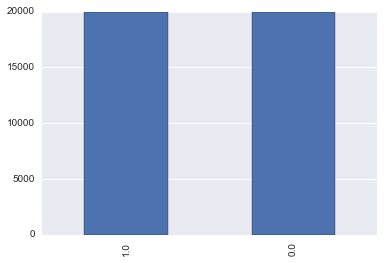

In [3]:
TT_Telecom.CHURNDEP.value_counts().plot(kind='bar')

In [9]:
pd.crosstab(index=0,columns=[TT_Telecom.CREDITCD,TT_Telecom.CHURNDEP])

CREDITCD     0            1       
CHURNDEP   0.0   1.0    0.0    1.0
row_0                             
0         6344  6623  13656  13377

### Bi-variate Analysis

Bi-variate Analysis finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous. Different methods are used to tackle these combinations during analysis process.

**Continuous & Continuous** : While doing bi-variate analysis between two continuous variables, we should look at scatter plot.
    It is a nifty way to find out the relationship between two variables. The pattern of scatter plot indicates the relationship
    between variables. The relationship can be linear or non-linear.
    **Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))**

**Categorical & Categorical** : To find the relationship between two categorical variables, we can use following methods:

- Two-way table: We can start analyzing the relationship by creating a two-way table of count and count%. 
    The rows represents the category of one variable and the columns represent the categories of the other variable.
    We show count or count% of observations available in each combination of row and column categories.
- Stacked Column Chart: This method is more of a visual form of Two-way table.

- **Chi-Square Test**: This test is used to derive the statistical significance of relationship between the variables.
    Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for 
    a larger population as well. Chi-square is based on the difference between the expected and observed frequencies
    in one or more categories in the two-way table. It returns probability for the computed chi-square distribution with
    the degree of freedom.
      - Probability of 0: It indicates that both categorical variable are dependent

      - Probability of 1: It shows that both variables are independent.

      - Probability less than 0.05: It indicates that the relationship between the variables is significant at 95% confidence.
        The chi-square test statistic for a test of independence of two categorical variables is found by:

Data Exploration, Chi Square, Business Analyticswhere O represents the observed frequency.
E is the expected frequency under the null hypothesis and computed by:
Data Exploration, Chi Square, Business Analytics
From previous two-way table, the expected count for product category 1 to be of small size is  0.22.
It is derived by taking the row total for Size (9) times the column total for Product category (2) then dividing by 
the sample size (81). This is procedure is conducted for each cell. Statistical Measures used to analyze the power of relationship are:

Cramer’s V for Nominal Categorical Variable
Mantel-Haenszed Chi-Square for ordinal categorical variable.
Different data science language and tools have specific methods to perform chi-square test. 
In SAS, we can use Chisq as an option with Proc freq to perform this test.

 

**Categorical & Continuous**: While exploring relation between categorical and continuous variables, we can draw box plots for
    each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look
    at the statistical significance we can perform Z-test, T-test or ANOVA.

- Z-Test/ T-Test:- Either test assess whether mean of two groups are statistically different from each other or not.
- Anova

### Missing values treatment

**Deletion:**  It is of two types: List Wise Deletion and Pair Wise Deletion.
In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

**Mean/ Mode/ Median Imputation:** Imputation is a method to fill in the missing values with estimated ones. The objective is to employ known relationships that can be identified in the valid values of the data set to assist in estimating the missing values. Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. It can be of two types:-
- Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median. Like in above table, variable “Manpower” is missing so we take average of all non missing values of “Manpower”  (28.33) and then replace missing value with it.
- Similar case Imputation: In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender. For “Male“, we will replace missing values of manpower with 29.75 and for “Female” with 25.
- Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.We can use regression, ANOVA, Logistic regression and various modeling technique to perform this. There are 2 drawbacks for this approach:

1. The model estimated values are usually more well-behaved than the true values
    If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not     be precise for estimating missing values.
    
**KNN Imputation:** In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.
    1. Advantages:
        k-nearest neighbour can predict both qualitative & quantitative attributes
        Creation of predictive model for each attribute with missing data is not required
        Attributes with multiple missing values can be easily treated
        Correlation structure of the data is taken into consideration
    2.Disadvantage:
        KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the           most similar instances.
        Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from           what we need whereas lower value of k implies missing out of significant attributes.


### Outlier treatment

### Variable transformation & Variable creation